<a href="https://colab.research.google.com/github/abigailroney/Data-Scraping/blob/main/Customer_Personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Customer Personality Analysis
Goal: Customer segmentation for targeted marketing.

---

## **Overview**
Briefly describe what the project is about, the dataset used, and the goal.  
Example:  
> This project analyzes customer personality data to identify factors influencing sales, website traffic, and more using Python for data cleaning, exploration, and visualization.

---

## **Dataset**
- **Source:** [Link to dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
- **Rows & Columns:** 2216 rows × 29 columns_
- **Description:** Customer descriptions (Age, Marital Status, Income, etc...), Products, Place of Sale, and Promotions.

---

## **Objectives**
1. Understand the problem and define analysis questions.
2. Explore and clean the dataset.
3. Perform statistical analysis and visualizations.
4. Identify patterns, trends, and correlations.
5. Summarize findings and recommend actions.

---

## **Tools & Libraries**
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Google Colab

---

## **Key Insights**
- 🔹 August and November were the two months with the highest average sales totals. These are prime months for marketing.
- 🔹 Wine is what customers are spending the most money on. To take advantage of this, there is a strong correlation between wine and meat sales. Perhaps there could be a meat and wine pairing deal.
- 🔹 The Web Visits vs Web Purchases plot tells us that there isn't a strong correlation between web visits and web purchases. This means that web visits aren't driving purchases on their own. A suggestion to fix this would be targeted offers/promotions to frequent visitors.
-🔹 There is a strong correlation between income and spending. However, there seems to be other factors influencing total spending. One possible influence is marital status. Further research can be done to see what else is influencing this correlation.

---

## **Next Steps**
*(Ideas on extending the project)*  
- Build a predictive model.  
- Integrate more data sources.  
- Automate data updates.

---

## **Author**
Abigail Roney  
[LinkedIn](https://linkedin.com/in/yourprofile) | [GitHub](https://github.com/yourusername)


# ✅ 1. Extract, Transform, and Load (ETL)

In [2]:
import zipfile

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d imakash3011/customer-personality-analysis
with zipfile.ZipFile('customer-personality-analysis.zip', 'r') as zip_ref:
  zip_ref.extractall('/customer_data.csv')

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 185MB/s]


In [3]:
import pandas as pd
df = pd.read_csv("/customer_data.csv/marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 🔍 3. Exploratory Data Analysis (EDA)

In [4]:
df.info()
df.describe()
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#check categorical data values
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [6]:
values_to_replace = ['Absurd', 'Alone', 'YOLO']
df['Marital_Status'] = df['Marital_Status'].replace(values_to_replace, 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')
print(df.Marital_Status.unique())

values_to_replace = ['Basic', 'Graduation']
df['Education'] = df['Education'].replace(values_to_replace, 'High School')
df['Education'] = df['Education'].replace('2n Cycle', 'Master')
print(df.Education.unique())

['Single' 'Married' 'Divorced' 'Widow']
['High School' 'PhD' 'Master']


# 🧹4. Clean the Data
Prepare the dataset for analysis by handling missing values, correcting data types, and removing duplicates.

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [8]:
print(df.Z_CostContact.unique())
print(df.Z_Revenue.unique())

[3]
[11]


In [9]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

💪

# 🔎 5. Analyze the Data
Summarize, group, and identify key patterns in the data.

In [10]:
print('📊 Summary Statistics:')
display(df.describe())
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
display(corr_matrix)

# Strong correlations
strong_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)].fillna(0)
print('\n 💪 Strong Correlations:')
display(strong_corr)


📊 Summary Statistics:


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.002274,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,-0.021491
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,0.023692
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,-0.077909
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,-0.153901
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,-0.199766
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,0.246299
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,0.122443
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,0.237746
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,0.108145



 💪 Strong Correlations:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year_Birth,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Income,0.0,0.0,1.000000,0.000000,0.0,0.0,0.578650,0.000000,0.584633,0.000000,...,0.589162,0.529362,-0.553088,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kidhome,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,-0.504501,-0.501349,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Teenhome,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Recency,0.0,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MntWines,0.0,0.0,0.578650,0.000000,0.0,0.0,1.000000,0.000000,0.568860,0.000000,...,0.634753,0.640012,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MntFruits,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.547822,0.593431,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MntMeatProducts,0.0,0.0,0.584633,0.000000,0.0,0.0,0.568860,0.547822,1.000000,0.573574,...,0.734127,0.000000,-0.539484,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MntFishProducts,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.593431,0.573574,1.000000,...,0.532757,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


✍ My findings based on the preliminary correlation maps is the following: the type of product, income, and num* columns (except dealspurchases & webvisits) are the ones with the strong correlations. Therefore, for my final correlation map, I will only include those columns.

# 🧐 6. Visualize the Data

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
numerical_cols = df.select_dtypes(include=['number']).columns

numerical_cols = df.select_dtypes(include=["number"]).columns


mask = pd.Series(True, index=df.index)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask &= df[col].between(lower_bound, upper_bound)
df_no_outliers = df[mask].copy()

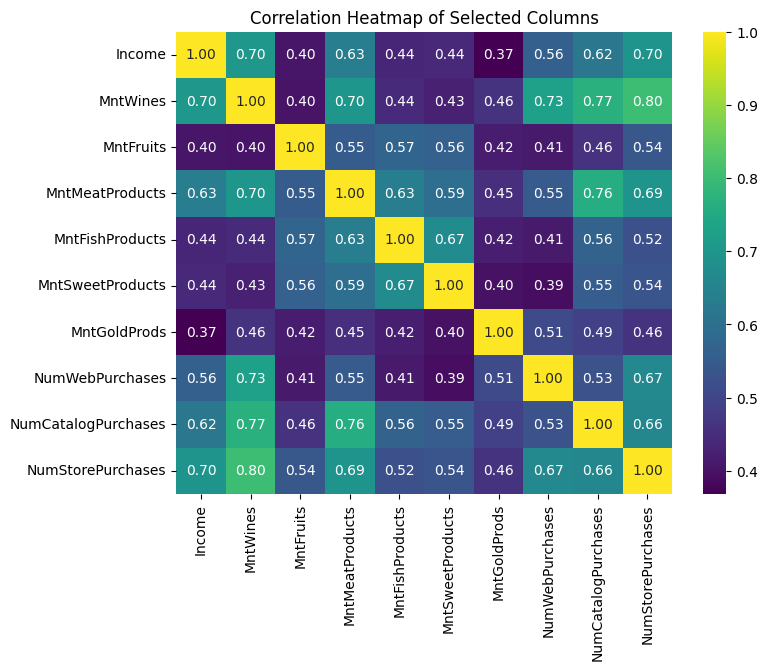

In [13]:
from ast import Num
selected_columns=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
corr_matrix = df_no_outliers[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

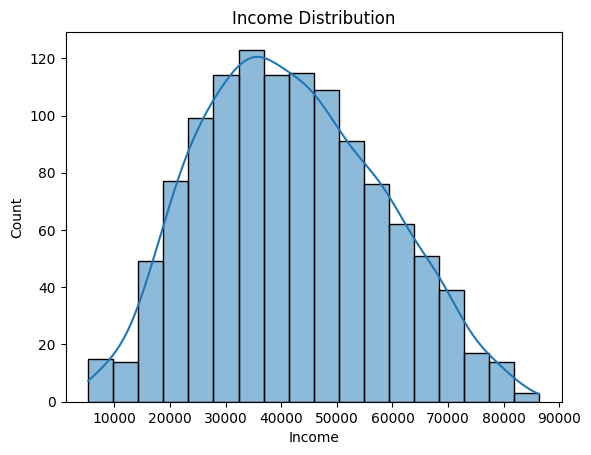

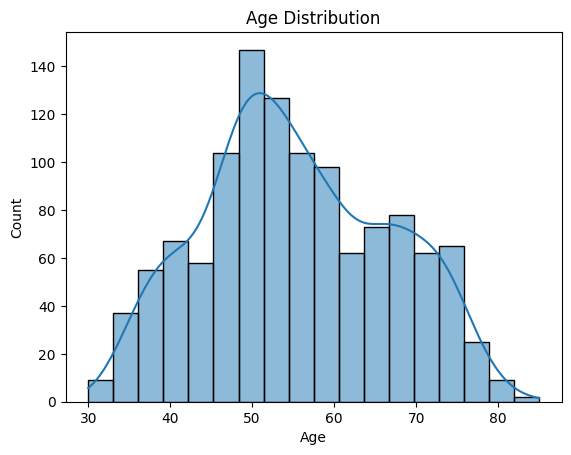

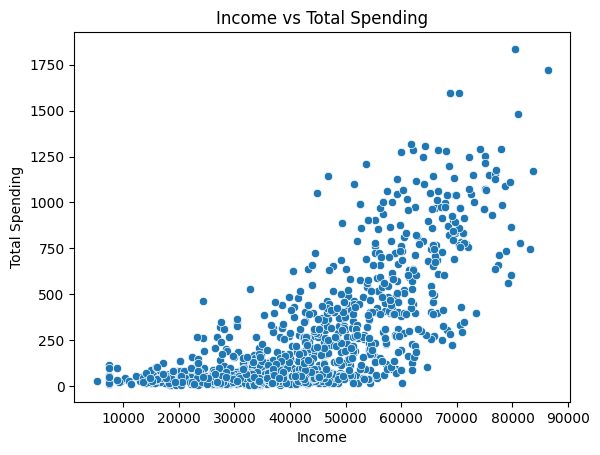

/tmp/ipython-input-606876718.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_spending.index, y=item_spending.values, palette='viridis')


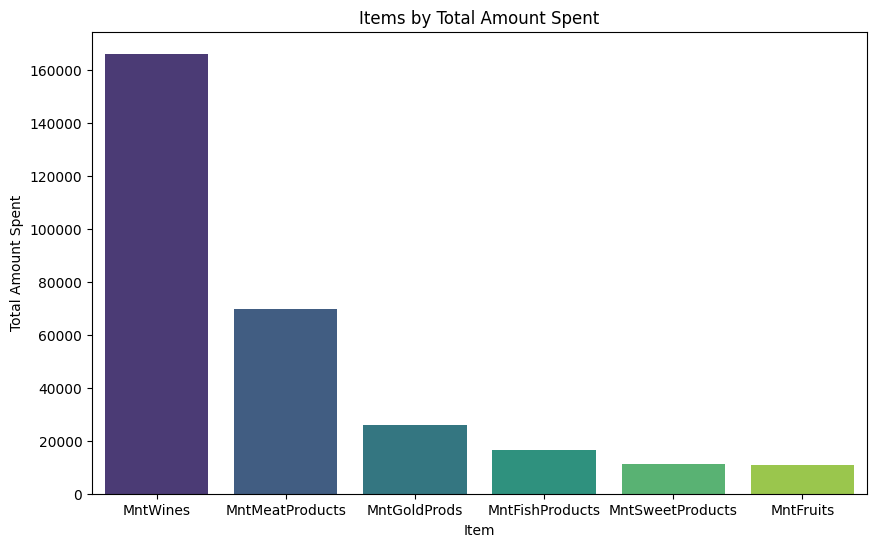

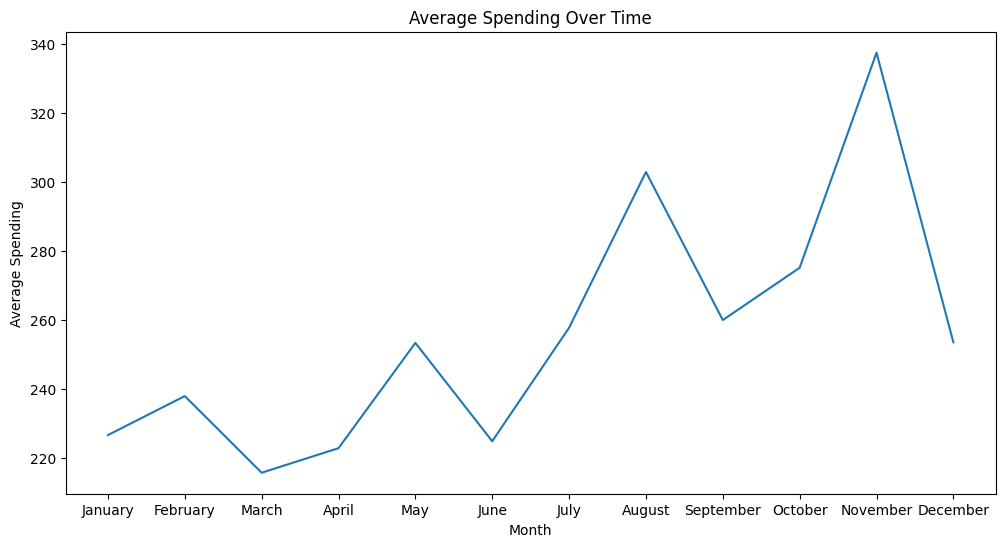

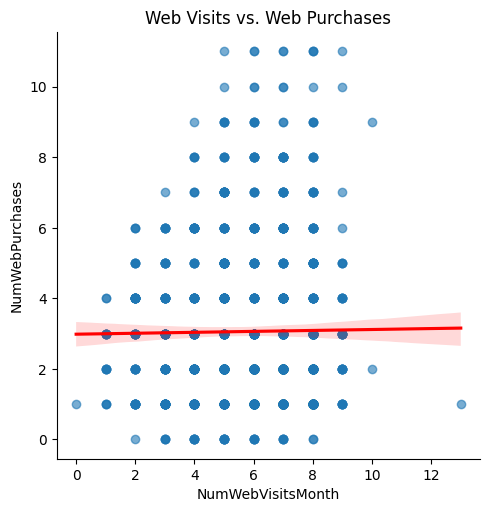

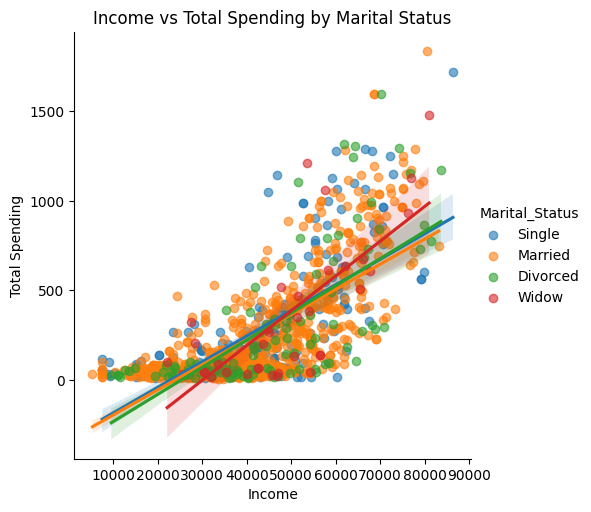

Correlation between Income and Total Spending by Marital Status:
Marital_Status
Divorced    0.709747
Married     0.747494
Single      0.701766
Widow       0.742871
Name: (Income, Total_Spent), dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#Histplot
sns.histplot(df_no_outliers['Income'], kde=True)
plt.title('Income Distribution')
plt.show()
#Histplot
df_no_outliers['Age'] = 2025 - df_no_outliers['Year_Birth']
sns.histplot(df_no_outliers['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
#Scatterplot
df_no_outliers['Total_Spent'] = df_no_outliers[['MntWines', 'MntFruits', 'MntMeatProducts',
                                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].astype(int).sum(axis=1)
sns.scatterplot(data=df_no_outliers, x='Income', y='Total_Spent')
plt.title('Income vs Total Spending')
plt.ylabel('Total Spending')
plt.show()

# Bar chart (best-sellers)
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
item_spending = df_no_outliers[mnt_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=item_spending.index, y=item_spending.values, palette='viridis')
plt.title('Items by Total Amount Spent')
plt.xlabel('Item')
plt.ylabel('Total Amount Spent')
plt.show()

# Line plot
df_no_outliers['Month'] = df_no_outliers['Dt_Customer'].dt.month_name()
avg_spent_per_month = df_no_outliers.groupby('Month')['Total_Spent'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_spent_per_month = avg_spent_per_month.reindex(month_order)
plt.figure(figsize=(12, 6))
plt.plot(avg_spent_per_month.index, avg_spent_per_month.values)
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.title('Average Spending Over Time')
plt.show()

# Linear Model Plot
sns.lmplot(
    x='NumWebVisitsMonth',
    y='NumWebPurchases',
    data=df_no_outliers,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Web Visits vs. Web Purchases')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('NumWebPurchases')
plt.show()

# Lmplot with Hue
sns.lmplot(
    x='Income',
    y='Total_Spent',
    hue='Marital_Status',
    data=df_no_outliers,
    scatter_kws={'alpha':0.6}
)
plt.title('Income vs Total Spending by Marital Status')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()
# Print correlation data from previous Lmplot
correlation_by_marital_status = df_no_outliers.groupby('Marital_Status')[['Income', 'Total_Spent']].corr().unstack().iloc[:, 1]

print("Correlation between Income and Total Spending by Marital Status:")
print(correlation_by_marital_status)